In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pickle
import itertools
import time
import os
from time import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from evaluation.classification import generate_class_results, plot_conf_mat, \
                                      get_classification_results

# Results generation

In [3]:
pickle_path = '/workspace/coniferas(1)/data_inference/pickles/treepar_dataset/'
res_path = "/workspace/coniferas(1)/data_inference/models/class/"

n_tips = ['674', '489', '87']

results = dict()

for i in n_tips:
    with open(pickle_path + "dataset_" + i + ".pkl", 'rb') as f:
        data = pickle.load(f)
    
    results[i] = dict()
        
    model_path = res_path + i + "_classification_"

    print('---', i, 'tips ---')
    results[i] = generate_class_results(model_path, data['X_test'],
                                        data['y_class_test'])

--- 674 tips ---
--- Inference time:  3.248525619506836 seconds ---
--- 489 tips ---
--- Inference time:  0.356522798538208 seconds ---
--- 87 tips ---
--- Inference time:  0.22150921821594238 seconds ---


In [4]:
get_classification_results(results)

,674,489,87
accuracy,0.921667,0.926667,0.825
F1-Score,0.920149,0.926178,0.82163
Recall,0.921667,0.926667,0.825
Precision,0.920927,0.928141,0.825823
Number of params,53110,14006,11446
Train time,913.521,1722.05,1402.99


# Confusion Matrices

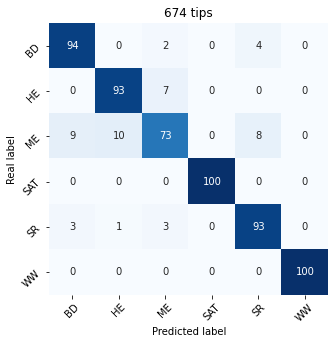

              precision    recall  f1-score   support

           0     0.8868    0.9400    0.9126       100
           1     0.8942    0.9300    0.9118       100
           2     0.8588    0.7300    0.7892       100
           3     1.0000    1.0000    1.0000       100
           4     0.8857    0.9300    0.9073       100
           5     1.0000    1.0000    1.0000       100

    accuracy                         0.9217       600
   macro avg     0.9209    0.9217    0.9201       600
weighted avg     0.9209    0.9217    0.9201       600



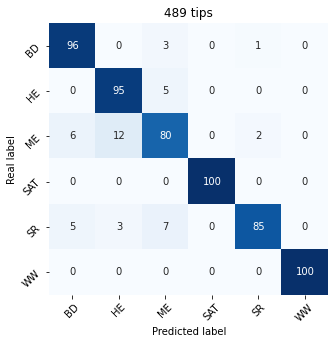

              precision    recall  f1-score   support

           0     0.8972    0.9600    0.9275       100
           1     0.8636    0.9500    0.9048       100
           2     0.8421    0.8000    0.8205       100
           3     1.0000    1.0000    1.0000       100
           4     0.9659    0.8500    0.9043       100
           5     1.0000    1.0000    1.0000       100

    accuracy                         0.9267       600
   macro avg     0.9281    0.9267    0.9262       600
weighted avg     0.9281    0.9267    0.9262       600



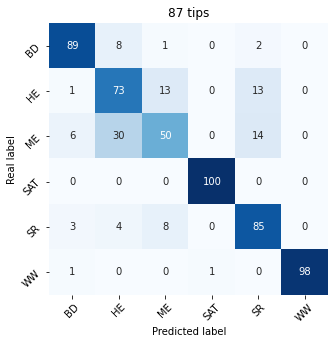

              precision    recall  f1-score   support

           0     0.8900    0.8900    0.8900       100
           1     0.6348    0.7300    0.6791       100
           2     0.6944    0.5000    0.5814       100
           3     0.9901    1.0000    0.9950       100
           4     0.7456    0.8500    0.7944       100
           5     1.0000    0.9800    0.9899       100

    accuracy                         0.8250       600
   macro avg     0.8258    0.8250    0.8216       600
weighted avg     0.8258    0.8250    0.8216       600



In [5]:
label_names = ["BD", "HE", "ME", "SAT", "SR", "WW"]
for i in results:
    plot_conf_mat((results[i]["y_pred"]), (results[i]["y_test"]), label_names, i)